In [1]:
import adaptive_latents as al
from adaptive_latents import NumpyTimedDataSource, Bubblewrap, AnimationManager, default_rwd_parameters, BWRun
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.default_rng()

In [2]:
hmm = al.input_sources.hmm_simulation.HMM.infinity_shape_hmm(n_states=71, displacement_center=2, displacement_spread=.06, variance_scale=.15)
beh, obs = hmm.simulate_with_states(n_steps=1000, rng=rng)

201it [00:17, 11.69it/s]                         


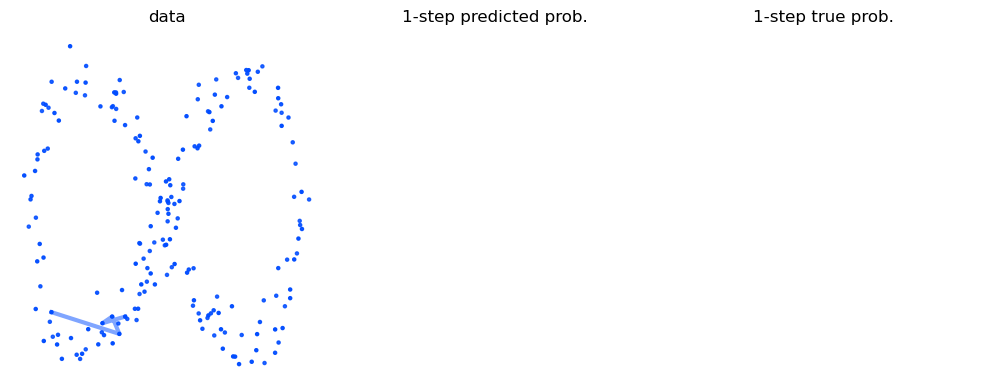

In [3]:
t = np.arange(obs.shape[0])
in_ds = NumpyTimedDataSource(obs, t, time_offsets=(0,1))


bw = Bubblewrap(dim=in_ds.output_shape, **dict(default_rwd_parameters, M=100, num=20, B_thresh=-5, num_grad_q=4))

class CustomAnimation(AnimationManager):
    n_rows = 1
    n_cols = 3
    figsize = (10,4)
    extension = "mp4"
    fps=10

    def custom_draw_frame(self, step, bw: Bubblewrap, br: BWRun):
        historical_observations, _ = br.input_ds.get_history()

        al.plotting_functions.show_bubbles_2d(self.axs[0,0], historical_observations, bw, show_names=False, tail_length=5, no_bubbles=True)
        # al.plotting_functions.show_nstep_pdf(self.ax[0,1], br, self.ax[0,0], self.fig, offset=1, show_colorbar=False)
        # al.plotting_functions.show_nstep_pdf(self.ax[0,2], br, self.ax[0,0], self.fig, hmm=hmm, method="hmm", offset=1, show_colorbar=False)
        self.axs[0,0].set_title("data")
        self.axs[0,2].set_title("1-step true prob.")
        self.axs[0,1].set_title("1-step predicted prob.")

        for ax in self.axs[0, :]:
            ax.axis("off")
    
    def frame_draw_condition(self, step_number, bw):
        condition = True
        condition = condition and 0 < step_number < 500
        return condition

        
am = CustomAnimation() if True else None

br = BWRun(bw=bw, in_ds=in_ds, animation_manager=am, show_tqdm=True)

br.run(limit=200, save=True)

In [4]:
t = np.arange(obs.shape[0])
in_ds = NumpyTimedDataSource(obs, t, time_offsets=(0,1))


bw = Bubblewrap(dim=in_ds.output_shape, **dict(default_rwd_parameters, M=100, num=20, B_thresh=-5, num_grad_q=4))

class CustomAnimation(AnimationManager):
    n_rows = 1
    n_cols = 3
    figsize = (10,4)
    extension = "mp4"
    fps=20

    def custom_draw_frame(self, step, bw: Bubblewrap, br: BWRun):
        historical_observations, _ = br.input_ds.get_history()

        al.plotting_functions.show_bubbles_2d(self.axs[0,0], historical_observations, bw, show_names=False, tail_length=5)
        al.plotting_functions.show_nstep_pdf(self.axs[0,1], br, self.axs[0,0], self.fig, offset=1, show_colorbar=False)
        al.plotting_functions.show_nstep_pdf(self.axs[0,2], br, self.axs[0,0], self.fig, hmm=hmm, method="hmm", offset=1, show_colorbar=False)
        self.axs[0,0].set_title("data and bubbles")
        self.axs[0,2].set_title("1-step true prob.")
        self.axs[0,1].set_title("1-step predicted prob.")

        for ax in self.axs[0, :]:
            ax.axis("off")
    
    def frame_draw_condition(self, step_number, bw):
        condition = True
        condition = condition and 0 < step_number < 800
        return condition

        
am = CustomAnimation() if True else None

br = BWRun(bw=bw, in_ds=in_ds, animation_manager=am, show_tqdm=True)

br.run(limit=1000, save=True)

100%|█████████▉| 998/999 [00:10<00:00, 95.13it/s] 


Text(0, 0.5, '1-step log predictive probability')

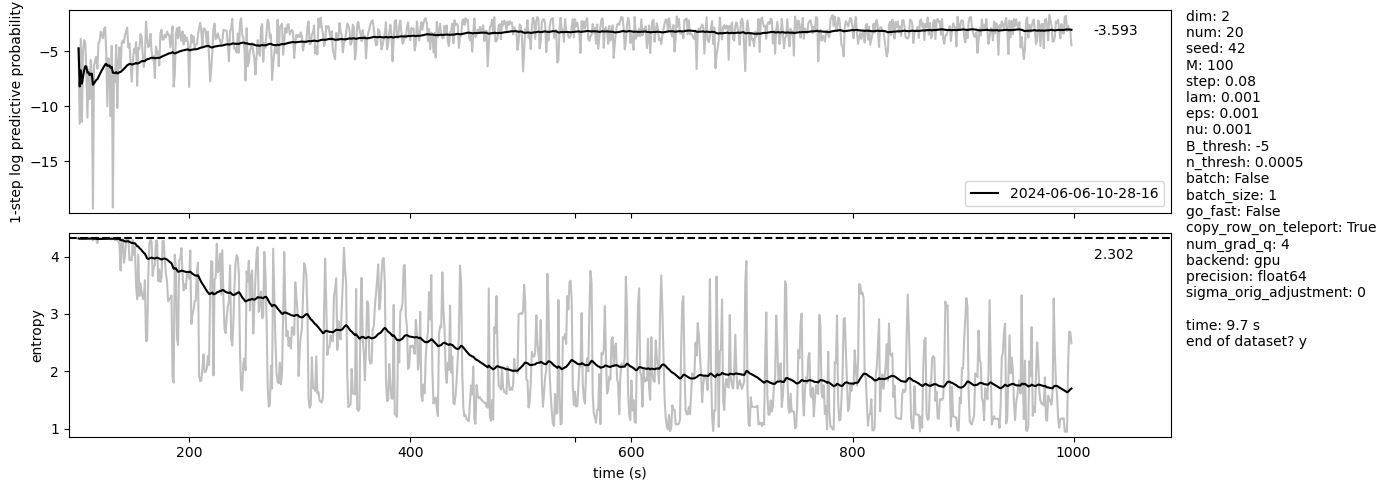

In [5]:
al.plotting_functions.compare_metrics([br], offset=1)
plt.gcf().axes[0].set_ylabel("1-step log predictive probability")